# Data Cleaning process


In [11]:
from glob import glob
import pandas as pd
import json

In [12]:
def log_writer(logfile,content):
    with open(logfile,'a') as file_handler:
        current_time = datetime.datetime.now()
        file_handler.write(str(current_time)+ " " + content + "\n")

In [13]:
def data_clean(df):
    df["ts"] = pd.to_datetime(df["timestamp"], format='%Y-%m-%d %H:%M:%S %Z', errors='coerce')
    mask = df.ts.isnull()
    if mask.sum():
        df.loc[mask, "ts"] = pd.to_datetime(df[mask]["timestamp"], format='%Y-%m-%d %H:%M:%S.%f %Z',errors='coerce')
        df['timestamp']=df['ts']
        df.drop(columns={'ts'},inplace=True)
    else:
        df["timestamp"] = pd.to_datetime(df["timestamp"])
    try:    
        df.drop(columns = {"plant","rnoc_tag_name","value_type","quality"},inplace=True)
    except KeyError:
#         content = " the columns plant,rnoc_tag_name,value_type,quality are not present in the data"
#         log_writer(log_file,content)
        print(" columns not found")
    
    new_df = df.pivot_table(index = "timestamp",columns="source_id_neuron",values = "value_float",dropna=False)
    new_df = new_df.reset_index()
#     content = "converted the table to have multiple columns"
#     log_writer(log_file,content)
    if new_df['timestamp'].dtypes=='datetime64[ns, UTC]':
        new_df.set_index(new_df['timestamp'],inplace=True)
        new_df = new_df.tz_convert('Asia/Kolkata')
        new_df.drop(columns = "timestamp",inplace=True)
    pre_processed_df =new_df.copy()
    final_df = pre_processed_df.interpolate(method='time')
#     content = "data interpolated by time"
#     log_writer(log_file,content)
    final_df =final_df.resample('5min').mean()
#     content = "converted the table to be aat 5 min interval time"
#     log_writer(log_file,content)
    final_df = final_df.drop_duplicates()
#     content = "Duplicates dropped"
#     log_writer(log_file,content)
    final_df = final_df.between_time('6:30', '18:30')
    final_df.dropna(inplace=True)
#     content = "Final Dataframe created"
#     log_writer(log_file,content)
    return final_df

In [14]:
if __name__ == '__main__':
    Jsontopd = pd.read_json("D:\\Adani\\Analytics Team Projects - Documents\\Data Cleaning -  IC\\Transformer\\Transformer_Block04_Rawdata\\bq-results-20211202-165253-5xep1iorh39b(3).json", lines=True)
    trafo_data = data_clean(Jsontopd)
    trafo_data.to_json("final_preprocessed_trafo_blk04.json")

In [27]:
trafo_data.to_json("final_preprocessed_trafo_blk04.json")

In [15]:
trafo_data.head()

source_id_neuron           /GHANI_531C/BLK/BLK04/IDT_TRAFO/OTI  \
timestamp                                                        
2021-02-21 06:40:00+05:30                            31.888833   
2021-02-21 06:45:00+05:30                            31.857892   
2021-02-21 06:50:00+05:30                            31.844991   
2021-02-21 06:55:00+05:30                            31.857849   
2021-02-21 07:00:00+05:30                            31.870456   

source_id_neuron           /GHANI_531C/BLK/BLK04/IDT_TRAFO/WTI  \
timestamp                                                        
2021-02-21 06:40:00+05:30                            32.108554   
2021-02-21 06:45:00+05:30                            30.751942   
2021-02-21 06:50:00+05:30                            30.183489   
2021-02-21 06:55:00+05:30                            32.630943   
2021-02-21 07:00:00+05:30                            30.466270   

source_id_neuron           /GHANI_531C/BLK/BLK04/LHS_LT_PANEL/MFM_LT_PANEL/ACTIVE_POWER  \
timestamp                                                                                 
2021-02-21 06:40:00+05:30                                           4.749713              
2021-02-21 06:45:00+05:30                                          10.725862              
2021-02-21 06:50:00+05:30                                          20.824969              
2021-02-21 06:55:00+05:30                                          32.608599              
2021-02-21 07:00:00+05:30                                          42.373438              

source_id_neuron           /GHANI_531C/BLK/BLK04/LHS_LT_PANEL/MFM_LT_PANEL/APPARENT_POWER  \
timestamp                                                                                   
2021-02-21 06:40:00+05:30                                          48.877173                
2021-02-21 06:45:00+05:30                                          46.035234                
2021-02-21 06:50:00+05:30                                          47.696421                
2021-02-21 06:55:00+05:30                                          52.858486                
2021-02-21 07:00:00+05:30                                          58.393706                

source_id_neuron           /GHANI_531C/BLK/BLK04/LHS_LT_PANEL/MFM_LT_PANEL/AVERAGE_CURRENT  \
timestamp                                                                                    
2021-02-21 06:40:00+05:30                                          54.707154                 
2021-02-21 06:45:00+05:30                                          51.653125                 
2021-02-21 06:50:00+05:30                                          53.622915                 
2021-02-21 06:55:00+05:30                                          59.666511                 
2021-02-21 07:00:00+05:30                                          66.069456                 

source_id_neuron           /GHANI_531C/BLK/BLK04/LHS_LT_PANEL/MFM_LT_PANEL/B_N_VOLTAGE  \
timestamp                                                                                
2021-02-21 06:40:00+05:30                                         295.687103             
2021-02-21 06:45:00+05:30                                         296.288588             
2021-02-21 06:50:00+05:30                                         294.018660             
2021-02-21 06:55:00+05:30                                         293.360025             
2021-02-21 07:00:00+05:30                                         293.642401             

source_id_neuron           /GHANI_531C/BLK/BLK04/LHS_LT_PANEL/MFM_LT_PANEL/B_PHASE_CURRENT  \
timestamp                                                                                    
2021-02-21 06:40:00+05:30                                          53.791191                 
2021-02-21 06:45:00+05:30                                          50.489493                 
2021-02-21 06:50:00+05:30                                          53.859874                 
2021-02-21 06:55:00+05:3

In [28]:
import matplotlib.pyplot as plt

In [36]:
import missingno as msmo

<AxesSubplot:>

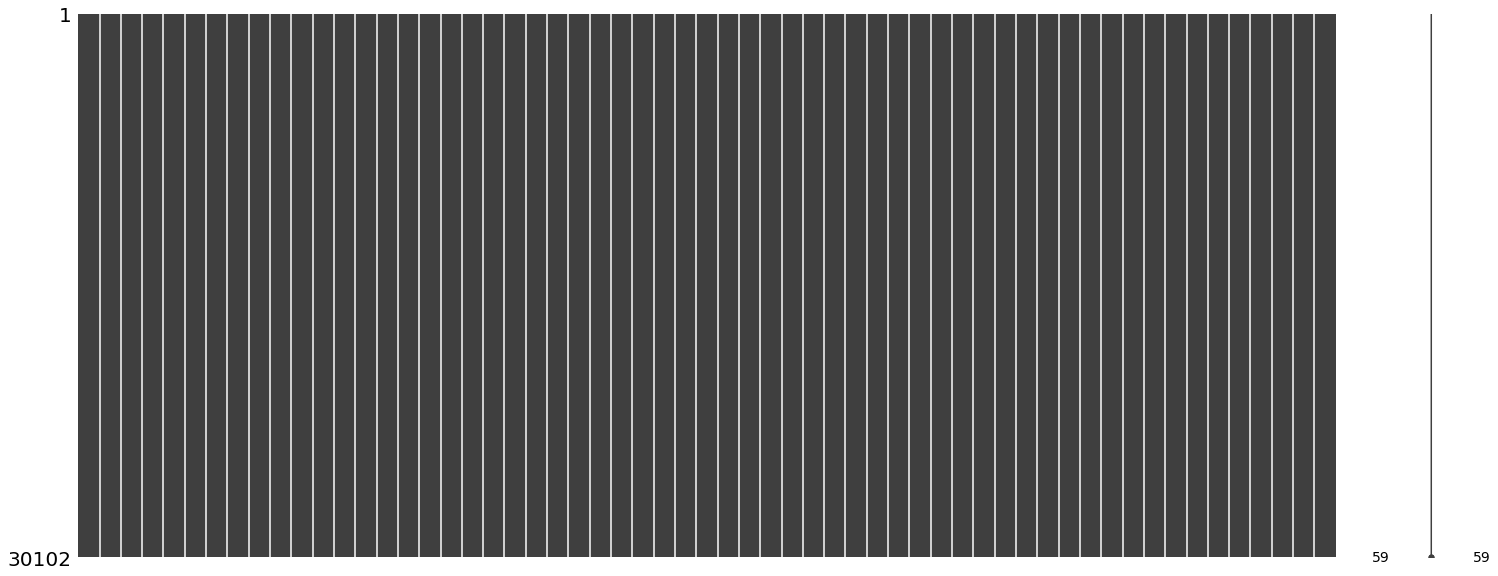

In [38]:
%matplotlib inline
msmo.matrix(trafo_data)

In [39]:
import numpy as np